# Exploracíon del dataset
_Santiago Prieto Núñez_

#### Objetivo
En este Jupiter Notebook explporaremos la forma de los datos de distintos dataset
obteniendo su distribución de tamaño de imágen, número de canales de la imágen,
tipo de etiquetado de la misma, ya que podemos tener desde máscaras con la 
localización del pólipo a sencillas etiquetas y cantidad de imágenes de tipo WLI
o NBI. o más tipos si los hubiera.

Los datasets explorados son los siguientes:
- Piccolo Dataset
- Kvasir Dataset
- CVC Dataset
- Polyp DB

In [4]:
import sys
import os

path_to_add = os.path.abspath('../utils')
if path_to_add not in sys.path:
    sys.path.append(path_to_add)

## CVC dataset
Este dataset es comunmenete utilizado y utiliza un formato de datos muy parecido
a otros datasets públicos.

Este dataset classifica la información usando:
- Máscara binaria

Total imágenes: 612
Composición del dataset:
Resoluciónes: total distintas resoluciones 1
	288x384: 612

Tipos de luz:
	Unknown: 612

Splits:
	None: 612

Canales:
	polyp_RGB: 612	mask_L: 612

Volumen medio de los pólipos respecto a la imagen:	9.16561144254191%
Distancia media del centro del pólipos al centro de la imagen:	67.32360429730554px


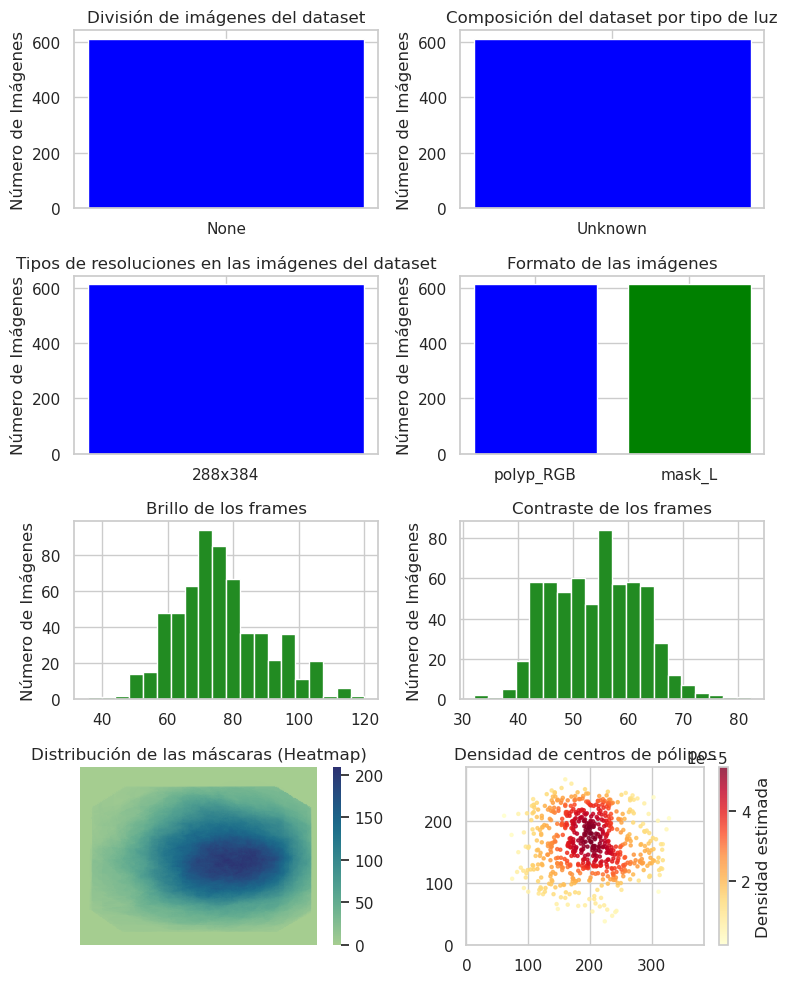

In [5]:
from utils import ImageDatasetProcessor as idp

DS_PATH = "../datasets"
json_path = DS_PATH + "/CVC-ClinicDB/cvc_dict.json"

# paths del dataset
path = (
    DS_PATH + "/CVC-ClinicDB/polyps",   # polyps
    DS_PATH + "/CVC-ClinicDB/masks")    # masks  

# inicializamos el dataset con su nombre y fichero de formatos de imagen
dt_cvc = idp(target_resolution=(384, 288), dataset_name="CVC",
                     json_path=json_path)

# procesamos el dataset si no existe el json
if not os.path.isfile(json_path):
    dt_cvc.load_dataset(path[0], path[1])

dt_cvc.print_summary()
dt_cvc.graph_summmary()


## Piccolo dataset

En este dataset es el que usamos de base

Este dataset clasifica la información usando:
- Máscara binaria
- Metadatos clínicos

In [6]:
DS_NAME = "Piccolo"
json_path = f"{DS_PATH}/piccolo_dataset/{DS_NAME}_dict.json"

# paths del dataset
paths_img = [
    # train paths
    (DS_PATH + "/piccolo_dataset/test/polyps",                      # polyps
     DS_PATH + "/piccolo_dataset/test/masks",                       # masks
     DS_PATH + "/piccolo_dataset/test/void", "test"  ,              # voids
     DS_PATH + "/piccolo_dataset/listado_WL-NBI_Piccolo.csv"),      # light type

    # test paths
    (DS_PATH + "/piccolo_dataset/train/polyps",
     DS_PATH + "/piccolo_dataset/train/masks",
     DS_PATH + "/piccolo_dataset/train/void", "train",
     DS_PATH + "/piccolo_dataset/listado_WL-NBI_Piccolo.csv"),

    # validation paths
    (DS_PATH + "/piccolo_dataset/validation/polyps",
     DS_PATH + "/piccolo_dataset/validation/masks",
     DS_PATH + "/piccolo_dataset/validation/void", "validation",
     DS_PATH + "/piccolo_dataset/listado_WL-NBI_Piccolo.csv")]

# inicializamos el dataset con su nombre y fichero de formatos de imagen
dt_Piccolo = idp(target_resolution=(400, 240), dataset_name=DS_NAME,
                     json_path=json_path)

# procesamos el dataset si no existe el json
if not os.path.isfile(json_path):
    for path in paths_img:
        print(f"procesando conjunto: {path[3]}")
        dt_Piccolo.load_dataset(path[0], path[1], voids_path=path[2], 
                                split=path[3], light_csv=path[4])

In [7]:
dt_Piccolo.print_summary()

Total imágenes: 3433
Composición del dataset:
Resoluciónes: total distintas resoluciones 2
	480x854: 1972	1080x1920: 1461

Tipos de luz:
	WL: 2131	NBI: 1302

Splits:
	test: 333	train: 2203	validation: 897

Canales:
	polyp_RGB: 3433	mask_L: 3433	void_L: 3433

Volumen medio de los pólipos respecto a la imagen:	20.195122875106236%
Distancia media del centro del pólipos al centro de la imagen:	59.03986288688952px


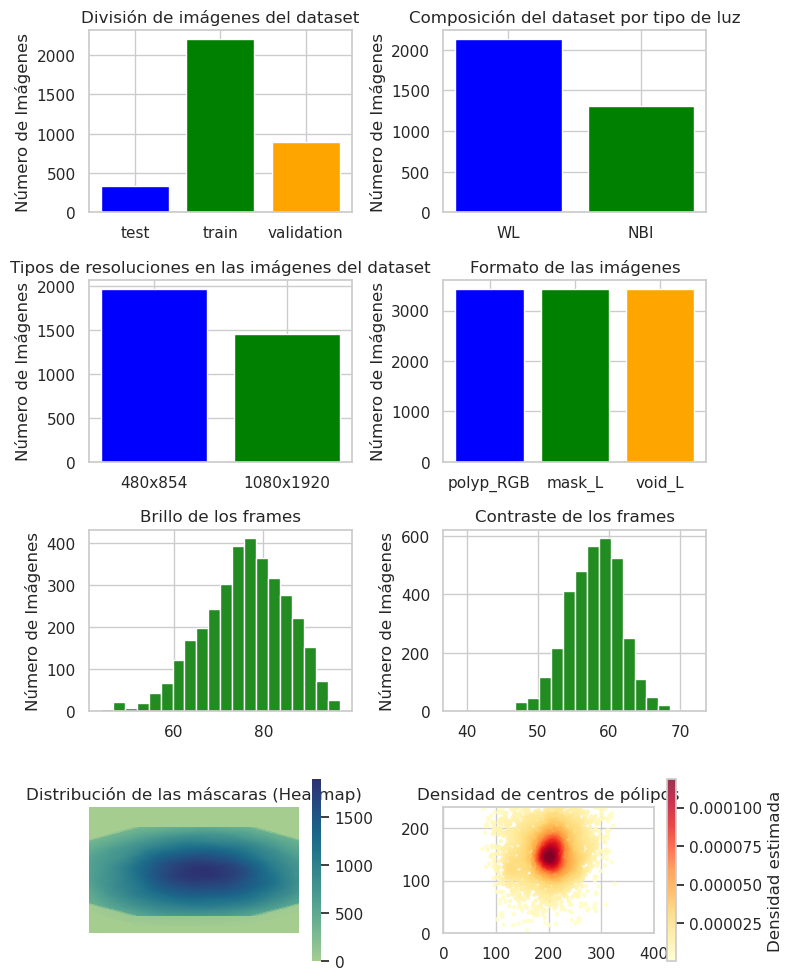

In [8]:
dt_Piccolo.graph_summmary()

## Kvasir-Seg

Este dataset clasifica los polipos con:
- Máscaras binarias
- Bounding boxes

In [9]:
DS_NAME = "Kvasir SEG"
json_path = f"{DS_PATH}/piccolo_dataset/{DS_NAME}_dict.json"

# paths del dataset
paths_img = [
    # train paths
    (DS_PATH + "/piccolo_dataset/test/polyps",                      # polyps
     DS_PATH + "/piccolo_dataset/test/masks",                       # masks
     DS_PATH + "/piccolo_dataset/test/void", "test"  ,              # voids
     DS_PATH + "/piccolo_dataset/listado_WL-NBI_Piccolo.csv"),      # light type

    # test paths
    (DS_PATH + "/piccolo_dataset/train/polyps",
     DS_PATH + "/piccolo_dataset/train/masks",
     DS_PATH + "/piccolo_dataset/train/void", "train",
     DS_PATH + "/piccolo_dataset/listado_WL-NBI_Piccolo.csv"),

    # validation paths
    (DS_PATH + "/piccolo_dataset/validation/polyps",
     DS_PATH + "/piccolo_dataset/validation/masks",
     DS_PATH + "/piccolo_dataset/validation/void", "validation",
     DS_PATH + "/piccolo_dataset/listado_WL-NBI_Piccolo.csv")]

# inicializamos el dataset con su nombre y fichero de formatos de imagen
dt_Piccolo = idp(target_resolution=(400, 240), dataset_name=DS_NAME,
                     json_path=json_path)

# procesamos el dataset si no existe el json
if not os.path.isfile(json_path):
    for path in paths_img:
        print(f"procesando conjunto: {path[3]}")
        dt_Piccolo.load_dataset(path[0], path[1], voids_path=path[2], 
                                split=path[3], light_csv=path[4])

# paths del dataset
paths_polyp_img = [("Kvasir-SEG/images", "polyp", "train", "WLI")]

paths_mask_img = [("Kvasir-SEG/masks", "mask", "train", "WLI")]

paths = paths_polyp_img + paths_mask_img

dt_Kevasir_SEG = Dataset()

# cargamos todos los paths
for path in paths:
    dt_Kevasir_SEG.load_dataset(path[0], path[1], path[2])

dt_Kevasir_SEG.print_summary()

NameError: name 'Dataset' is not defined

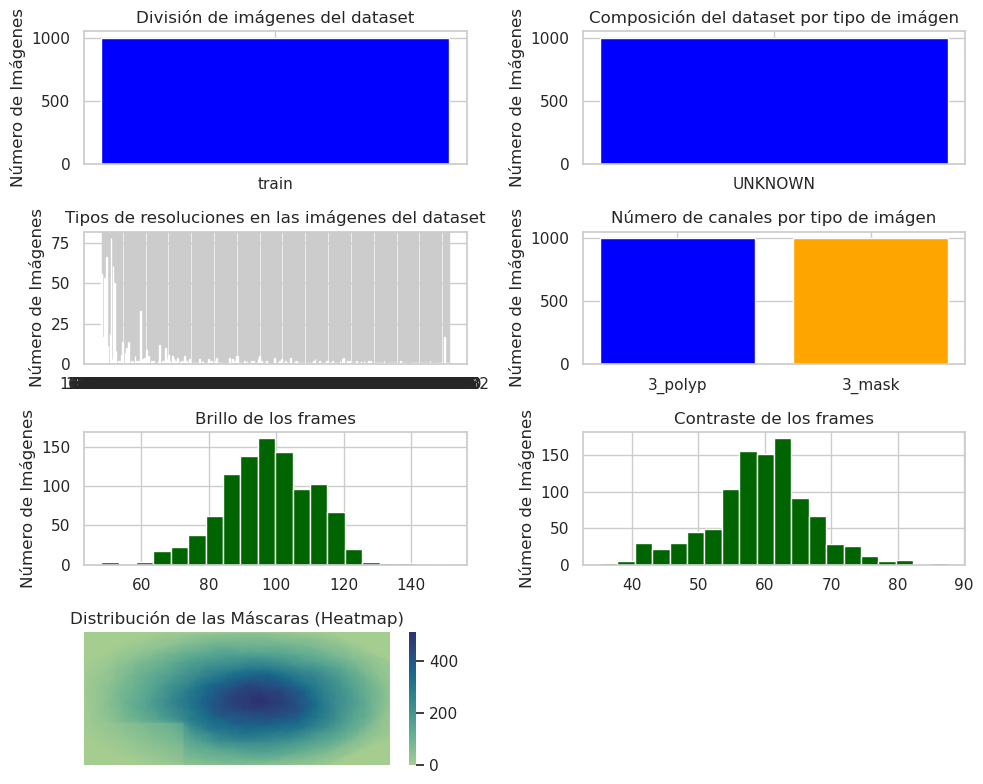

In [197]:
dt_Kevasir_SEG.graph_summmary()

## PolypDB
Este dataset se caracteriza por ser bastante completo y dar imágenes en formatos
muy distintos de imágen con los siguientes métodos para clasificar las imágenes:
- Máscara binaria

_Apuntar que cargo tan solo los datos de modality wise_

In [198]:
# paths del dataset
paths_polyp_img = [
    ("PolypDB/PolypDB_modality_wise/BLI/images", "polyp", "train", "BLI"),
    ("PolypDB/PolypDB_modality_wise/FICE/images", "polyp", "train", "FICE"),
    ("PolypDB/PolypDB_modality_wise/LCI/images", "polyp", "train", "LCI"),
    ("PolypDB/PolypDB_modality_wise/NBI/images", "polyp", "train", "NBI"),
    ("PolypDB/PolypDB_modality_wise/WLI/images", "polyp", "train", "WLI")]

paths_mask_img = [
    ("PolypDB/PolypDB_modality_wise/BLI/masks", "mask", "train", "BLI"),
    ("PolypDB/PolypDB_modality_wise/FICE/masks", "mask", "train", "FICE"),
    ("PolypDB/PolypDB_modality_wise/LCI/masks", "mask", "train", "LCI"),
    ("PolypDB/PolypDB_modality_wise/NBI/masks", "mask", "train", "NBI"),
    ("PolypDB/PolypDB_modality_wise/WLI/masks", "mask", "train", "WLI")]

paths = paths_polyp_img + paths_mask_img

dt_PolypDB = Dataset()

# cargamos todos los paths
for path in paths:
    dt_PolypDB.load_dataset(path[0], path[1], path[2], path[3])

dt_PolypDB.print_summary()

Error cargando PolypDB/PolypDB_modality_wise/BLI/images/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/BLI/images" cargado con éxito
Error cargando PolypDB/PolypDB_modality_wise/FICE/images/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/FICE/images" cargado con éxito
Error cargando PolypDB/PolypDB_modality_wise/LCI/images/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/LCI/images" cargado con éxito
Directorio "PolypDB/PolypDB_modality_wise/NBI/images" cargado con éxito
Directorio "PolypDB/PolypDB_modality_wise/WLI/images" cargado con éxito
Error cargando PolypDB/PolypDB_modality_wise/BLI/masks/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/BLI/masks" cargado con éxito
Error cargando PolypDB/PolypDB_modality_wise/FICE/masks/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/FICE/masks" cargado con éxito
Directorio "PolypDB/PolypDB_modality_wise/LCI/masks" cargado con éxito
Directorio "PolypDB/PolypDB_modality_wise/NBI/masks" cargado con éxito
Directorio "PolypDB/Poly

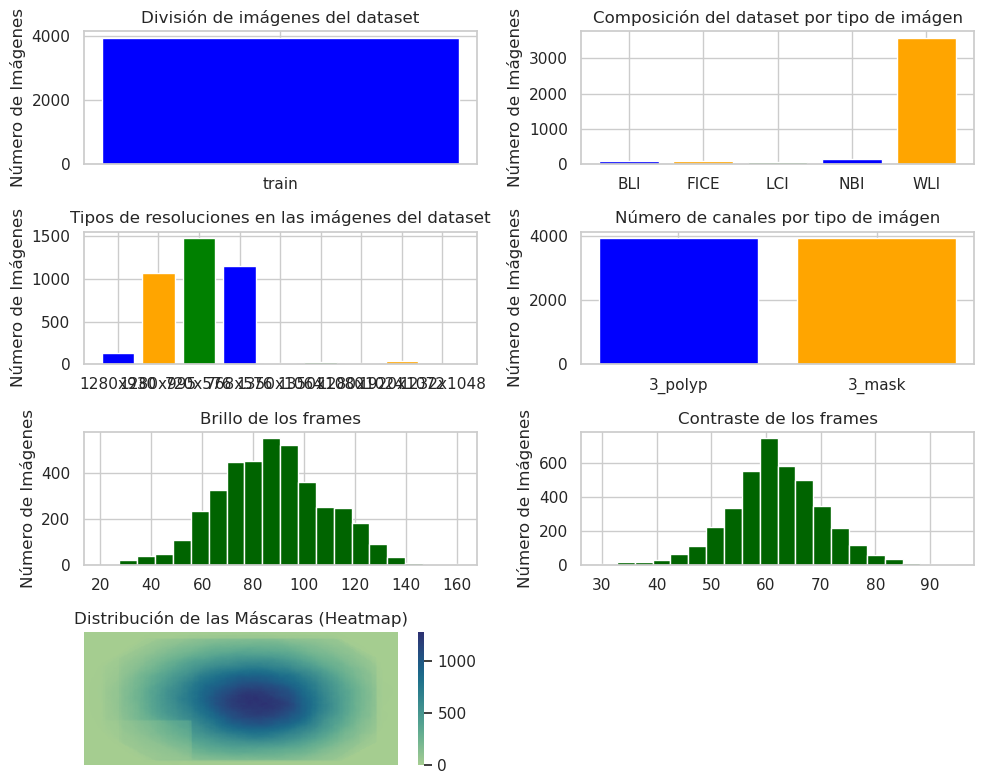

In [199]:
dt_PolypDB.graph_summmary()